### Evaluate performance of the networks in different conditions

In [1]:
import matplotlib.pyplot as pyplot
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import math
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo
from PIL import Image
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import os, random
import pandas as pd
import seaborn as sns
sns.set(style="white")


## Original images

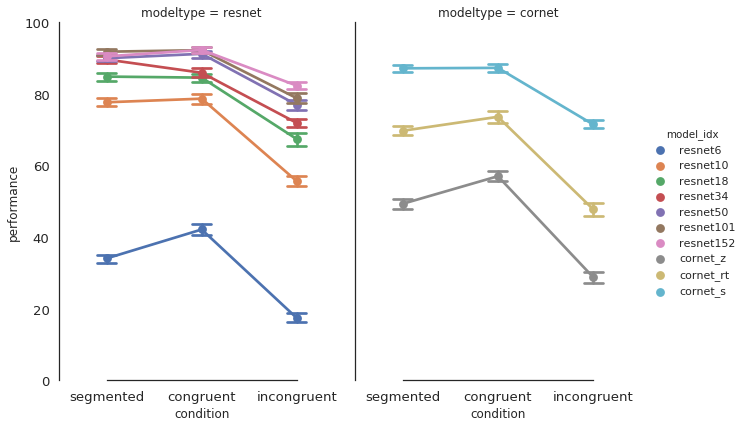

In [2]:
models = ['resnet6', 'resnet10', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152','cornet_z', 'cornet_rt', 'cornet_s' ]
conditions = ['w', 'a', 't'] 
data=[]
alldata=pd.DataFrame()
import csv        

for model in models:

    segmented = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/original/allruns_"+ model + "_w_background.txt" ,header=None)
    congruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/original/allruns_"+ model + "_t_background.txt",header=None)
    incongruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/original/allruns_"+ model +"_a_background.txt",header=None)

    segmented['condition'] = 'segmented'
    congruent['condition'] = 'congruent'
    incongruent['condition'] = 'incongruent'
    segmented['model_idx']=model
    congruent['model_idx']=model            
    incongruent['model_idx']=model
                            
    data= pd.concat([segmented, congruent,incongruent],axis=0)
    data.rename({0:'performance'},axis=1,inplace=True)
    data['modeltype']=model[0:6]
    data.reset_index(inplace=True)
    data.rename({'index':'subj_idx'},axis=1,inplace=True)

    #print(data)
        
    alldata = pd.concat([alldata, data],axis=0)
    

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="condition", y="performance", hue="model_idx", col="modeltype",
                capsize=.2, 
                #palette="YlGnBu_d",
                ci = 95,
                height=6, aspect=.75,
                kind="point", 
                data=alldata)
g.despine(left=True)

g.set(ylim=(0,100))

sns.set_style("dark",{'axes.axisbelow': True,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': False,
 'axes.spines.left': False,
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Helvetica Neue Light',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

#sns.set_context("talk")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
sns.despine(offset=0, trim=True)

g.savefig("performance_models.pdf" ,format="pdf")

In [3]:
from statsmodels.stats.anova import AnovaRM
from scipy.stats import pearsonr, percentileofscore, ttest_ind, ttest_ind_from_stats, ttest_rel, wilcoxon, ranksums
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.formula.api import ols

In [5]:
from scipy.stats import friedmanchisquare

means = alldata[alldata['model_idx']=='resnet152']

seg = means[means['condition'] == 'segmented']['performance']
con = means[means['condition'] == 'congruent']['performance']
incon = means[means['condition'] == 'incongruent']['performance']

stat, p = friedmanchisquare(seg,con,incon)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
          


Statistics=52.676, p=0.000
Different distribution (reject H0)


In [ ]:
from pingouin import pairwise_ttests, read_dataset

means=alldata
means.to_csv('all_networks.csv')
for model in models:
    means_data = means[means['model_idx']==model]
    if model == 'resnet6': #start file
        posthocs = pairwise_ttests(dv='performance',within='condition', subject='subj_idx',data=means_data,parametric=False)    
    else:
        posthocs = posthocs.append(pairwise_ttests(dv='performance',within='condition', subject='subj_idx',data=means_data,parametric=False))
    
    #print(posthocs['p-unc'])

p_vals = posthocs['p-unc']

from statsmodels.stats.multitest import multipletests

y=multipletests(pvals=p_vals,alpha=0.05,method="fdr_bh")
print(y[0])
for i in range(len(y[1])):
    print(y[1][i])
    
posthocs['p_adj']=y[i]
posthocs.to_csv('posthocs.csv')


## Noise 

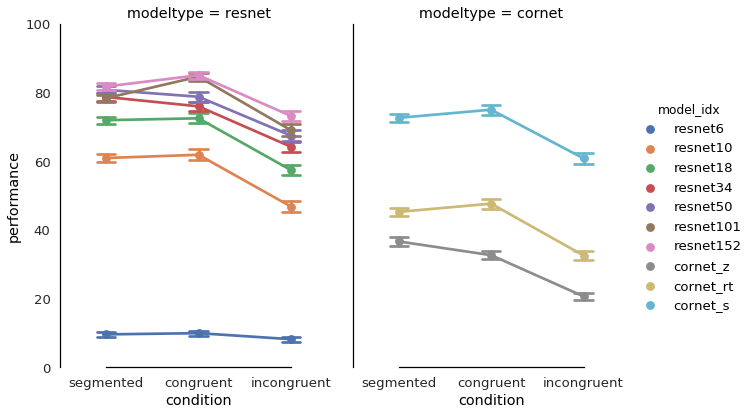

In [262]:
models = ['resnet6', 'resnet10', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152','cornet_z', 'cornet_rt', 'cornet_s' ]
conditions = ['w', 'a', 't'] 
data=[]
alldata=pd.DataFrame()
import csv        

for model in models:

    segmented = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/noise/allruns_"+ model + "_w_background.txt" ,header=None)
    congruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/noise/allruns_"+ model + "_t_background.txt",header=None)
    incongruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/noise/allruns_"+ model +"_a_background.txt",header=None)

    segmented['condition'] = 'segmented'
    congruent['condition'] = 'congruent'
    incongruent['condition'] = 'incongruent'
    segmented['model_idx']=model
    congruent['model_idx']=model            
    incongruent['model_idx']=model
                            
    data= pd.concat([segmented, congruent,incongruent],axis=0)
    data.rename({0:'performance'},axis=1,inplace=True)
    data['modeltype']=model[0:6]
    data.reset_index(inplace=True)
    data.rename({'index':'subj_idx'},axis=1,inplace=True)

    #print(data)
        
    alldata = pd.concat([alldata, data],axis=0)
    
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="condition", y="performance", hue="model_idx", col="modeltype",
                capsize=.2, 
                #palette="YlGnBu_d",
                ci = 95,
                height=6, aspect=.75,
                kind="point", 
                data=alldata)
g.despine(left=True)

g.set(ylim=(0,100))

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
sns.despine(offset=0, trim=True)

g.savefig("performance_models_noise.pdf" ,format="pdf")

## Object noise 

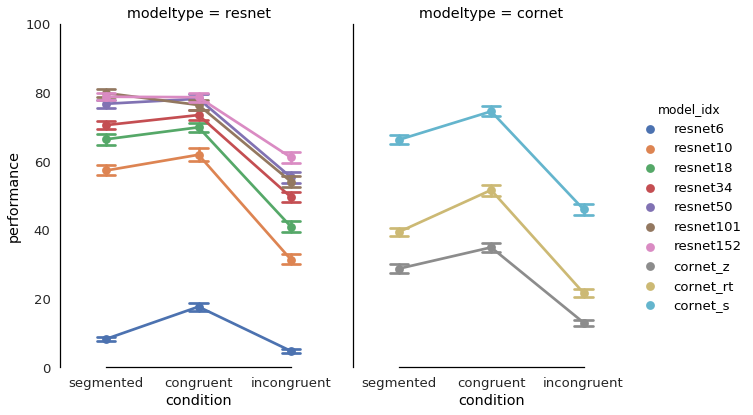

In [223]:
models = ['resnet6', 'resnet10', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152','cornet_z', 'cornet_rt', 'cornet_s' ]
conditions = ['w', 'a', 't'] 
data=[]
alldata=pd.DataFrame()
import csv        

for model in models:

    segmented = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/objnoise/allruns_"+ model + "_w_background.txt" ,header=None)
    congruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/objnoise/allruns_"+ model + "_t_background.txt",header=None)
    incongruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/objnoise/allruns_"+ model +"_a_background.txt",header=None)

    segmented['condition'] = 'segmented'
    congruent['condition'] = 'congruent'
    incongruent['condition'] = 'incongruent'
    segmented['model_idx']=model
    congruent['model_idx']=model            
    incongruent['model_idx']=model
                            
    data= pd.concat([segmented, congruent,incongruent],axis=0)
    data.rename({0:'performance'},axis=1,inplace=True)
    data['modeltype']=model[0:6]
    data.reset_index(inplace=True)
    data.rename({'index':'subj_idx'},axis=1,inplace=True)

    #print(data)
        
    alldata = pd.concat([alldata, data],axis=0)

g = sns.catplot(x="condition", y="performance", hue="model_idx", col="modeltype",
                capsize=.2, 
                #palette="YlGnBu_d",
                ci = 95,
                height=6, aspect=.75,
                kind="point", 
                data=alldata)
g.despine(left=True)

g.set(ylim=(0,100))

#sns.set_context("talk")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
sns.despine(offset=0, trim=True)

g.savefig("performance_models_objnoise.pdf" ,format="pdf")

## Background noise 

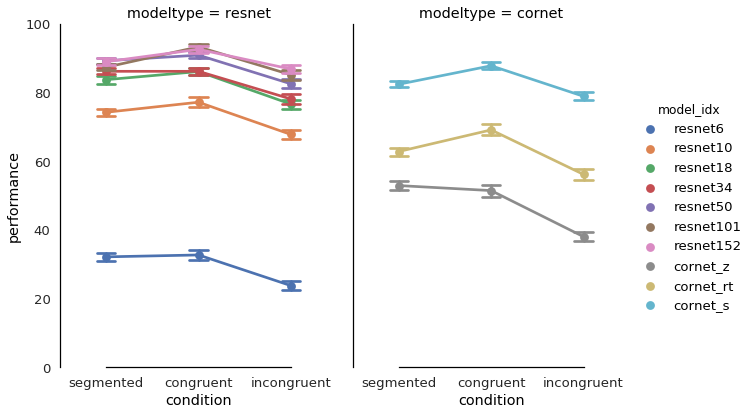

In [241]:
models = ['resnet6', 'resnet10', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152','cornet_z', 'cornet_rt', 'cornet_s' ]
conditions = ['w', 'a', 't'] 
data=[]
alldata=pd.DataFrame()
import csv        

for model in models:

    segmented = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/bgnoise/allruns_"+ model + "_w_background.txt" ,header=None)
    congruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/bgnoise/allruns_"+ model + "_t_background.txt",header=None)
    incongruent = pd.read_table("/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/bgnoise/allruns_"+ model +"_a_background.txt",header=None)

    segmented['condition'] = 'segmented'
    congruent['condition'] = 'congruent'
    incongruent['condition'] = 'incongruent'
    segmented['model_idx']=model
    congruent['model_idx']=model            
    incongruent['model_idx']=model
                            
    data= pd.concat([segmented, congruent,incongruent],axis=0)
    data.rename({0:'performance'},axis=1,inplace=True)
    data['modeltype']=model[0:6]
    data.reset_index(inplace=True)
    data.rename({'index':'subj_idx'},axis=1,inplace=True)

    #print(data)
        
    alldata = pd.concat([alldata, data],axis=0)
    

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="condition", y="performance", hue="model_idx", col="modeltype",
                capsize=.2, 
                #palette="YlGnBu_d",
                ci = 95,
                height=6, aspect=.75,
                kind="point", 
                data=alldata)
g.despine(left=True)

g.set(ylim=(0,100))

#sns.set_context("talk")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
sns.despine(offset=0, trim=True)

g.savefig("performance_models_bgnoise.pdf" ,format="pdf")